In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/archive (2).zip" -d "/content/us_data"


Archive:  /content/drive/MyDrive/archive (2).zip
  inflating: /content/us_data/2009.csv  
  inflating: /content/us_data/2010.csv  
  inflating: /content/us_data/2011.csv  
  inflating: /content/us_data/2012.csv  
  inflating: /content/us_data/2013.csv  
  inflating: /content/us_data/2014.csv  
  inflating: /content/us_data/2015.csv  
  inflating: /content/us_data/2016.csv  
  inflating: /content/us_data/2017.csv  
  inflating: /content/us_data/2018.csv  
 extracting: /content/us_data/archive (3).zip  


In [3]:
import os
os.listdir('/content/us_data')


['2012.csv',
 '2009.csv',
 '2011.csv',
 '2015.csv',
 '2017.csv',
 '2013.csv',
 '2018.csv',
 '2014.csv',
 '2016.csv',
 '2010.csv',
 'archive (3).zip']

In [4]:
!unzip "/content/us_data/archive (3).zip" -d "/content/eu_data"


Archive:  /content/us_data/archive (3).zip
  inflating: /content/eu_data/flights.csv  


In [5]:
os.listdir('/content/eu_data')


['flights.csv']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 50)


In [7]:
us_folder = "/content/us_data"

us_files = [f for f in os.listdir(us_folder) if f.endswith(".csv")]
us_list = []

for file in us_files:
    path = os.path.join(us_folder, file)
    print("Loading:", file)

    df = pd.read_csv(path, low_memory=False)
    df_sample = df.sample(frac=0.02, random_state=42)

    us_list.append(df_sample)

us = pd.concat(us_list, ignore_index=True)

print("Final US sample shape:", us.shape)
us.head()


Loading: 2012.csv
Loading: 2009.csv
Loading: 2011.csv
Loading: 2015.csv
Loading: 2017.csv
Loading: 2013.csv
Loading: 2018.csv
Loading: 2014.csv
Loading: 2016.csv
Loading: 2010.csv
Final US sample shape: (1231139, 28)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2012-08-26,US,941,CLE,CLT,900.0,854.0,-6.0,8.0,902.0,1006.0,10.0,1038.0,1016.0,-22.0,0.0,NaN,0.0,98.0,82.0,64.0,430.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-12-06,UA,334,LGA,IAH,1021.0,1019.0,-2.0,20.0,1039.0,1249.0,5.0,1336.0,1254.0,-42.0,0.0,NaN,0.0,255.0,215.0,190.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-10-10,WN,2484,MCI,PHX,1825.0,1837.0,12.0,10.0,1847.0,1935.0,7.0,1920.0,1942.0,22.0,0.0,NaN,0.0,175.0,185.0,168.0,1044.0,8.0,0.0,10.0,0.0,4.0,NaN
3,2012-07-27,OO,4724,MSP,ATW,1935.0,1929.0,-6.0,13.0,1942.0,2029.0,4.0,2041.0,2033.0,-8.0,0.0,NaN,0.0,66.0,64.0,47.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-03-23,DL,796,IND,ATL,1028.0,1025.0,-3.0,13.0,1038.0,1154.0,5.0,1200.0,1159.0,-1.0,0.0,NaN,0.0,92.0,94.0,76.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
us = us.rename(columns={
    "OP_CARRIER": "AIRLINE",
    "ORIGIN": "ORIGIN_AIRPORT",
    "DEST": "DEST_AIRPORT",
    "ARR_DELAY": "ARR_DELAY_MIN",
    "DEP_DELAY": "DEP_DELAY_MIN",
})

us['FL_DATE'] = pd.to_datetime(us['FL_DATE'])
us['MONTH'] = us['FL_DATE'].dt.month
us['DAY_OF_WEEK'] = us['FL_DATE'].dt.dayofweek + 1 # +1 to make Monday=1, Sunday=7

us = us[[
    "AIRLINE",
    "ORIGIN_AIRPORT",
    "DEST_AIRPORT",
    "ARR_DELAY_MIN",
    "DEP_DELAY_MIN",
    "MONTH",
    "DAY_OF_WEEK",
    "CRS_DEP_TIME",
    "CANCELLED"
]]

us.head()

,AIRLINE,ORIGIN_AIRPORT,DEST_AIRPORT,ARR_DELAY_MIN,DEP_DELAY_MIN,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CANCELLED
0,US,CLE,CLT,-22.0,-6.0,8,7,900.0,0.0
1,UA,LGA,IAH,-42.0,-2.0,12,4,1021.0,0.0
2,WN,MCI,PHX,22.0,12.0,10,3,1825.0,0.0
3,OO,MSP,ATW,-8.0,-6.0,7,5,1935.0,0.0
4,DL,IND,ATL,-1.0,-3.0,3,5,1028.0,0.0


In [9]:

us = us[us["CANCELLED"] == 0]


us = us.dropna(subset=["ARR_DELAY_MIN", "DEP_DELAY_MIN"])


us = us.dropna(subset=["AIRLINE", "ORIGIN_AIRPORT", "DEST_AIRPORT"])

print("US dataset after cleaning:", us.shape)
us.head()


US dataset after cleaning: (1208521, 9)


,AIRLINE,ORIGIN_AIRPORT,DEST_AIRPORT,ARR_DELAY_MIN,DEP_DELAY_MIN,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CANCELLED
0,US,CLE,CLT,-22.0,-6.0,8,7,900.0,0.0
1,UA,LGA,IAH,-42.0,-2.0,12,4,1021.0,0.0
2,WN,MCI,PHX,22.0,12.0,10,3,1825.0,0.0
3,OO,MSP,ATW,-8.0,-6.0,7,5,1935.0,0.0
4,DL,IND,ATL,-1.0,-3.0,3,5,1028.0,0.0


In [10]:
eu_path = "/content/eu_data/flights.csv"
eu = pd.read_csv(eu_path)

eu = eu.rename(columns={
    "YEAR": "YEAR",
    "MONTH_NUM": "MONTH",
    "MONTH_MON": "MONTH_NAME",
    "FLT_DATE": "FLIGHT_DATE",
    "APT_ICAO": "AIRPORT_CODE",
    "APT_NAME": "AIRPORT_NAME",
    "STATE_NAME": "REGION",
    "FLT_DEP_1": "FLIGHTS_DEPARTURE",
    "FLT_ARR_1": "FLIGHTS_ARRIVAL",
    "FLT_TOT_1": "FLIGHTS_TOTAL",
    "FLT_DEP_IFR_2": "IFR_DEPARTURE",
    "FLT_ARR_IFR_2": "IFR_ARRIVAL",
    "FLT_TOT_IFR_2": "IFR_TOTAL"
})

eu = eu[[
    "YEAR",
    "MONTH",
    "MONTH_NAME",
    "FLIGHT_DATE",
    "AIRPORT_CODE",
    "AIRPORT_NAME",
    "REGION",
    "FLIGHTS_DEPARTURE",
    "FLIGHTS_ARRIVAL",
    "FLIGHTS_TOTAL",
    "IFR_DEPARTURE",
    "IFR_ARRIVAL",
    "IFR_TOTAL"
]]

print("Europe dataset ready:", eu.shape)
eu.head()


Europe dataset ready: (688099, 13)


,YEAR,MONTH,MONTH_NAME,FLIGHT_DATE,AIRPORT_CODE,AIRPORT_NAME,REGION,FLIGHTS_DEPARTURE,FLIGHTS_ARRIVAL,FLIGHTS_TOTAL,IFR_DEPARTURE,IFR_ARRIVAL,IFR_TOTAL
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN


In [11]:
us["DELAYED_15"] = (us["ARR_DELAY_MIN"] > 15).astype(int)


In [12]:
def extract_hour(x):
    try:
        x = int(x)
        return x // 100
    except:
        return None

us["DEP_HOUR"] = us["CRS_DEP_TIME"].apply(extract_hour)


/tmp/ipython-input-4274536580.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="MONTH", y="ARR_DELAY_MIN", data=us, ci=None)


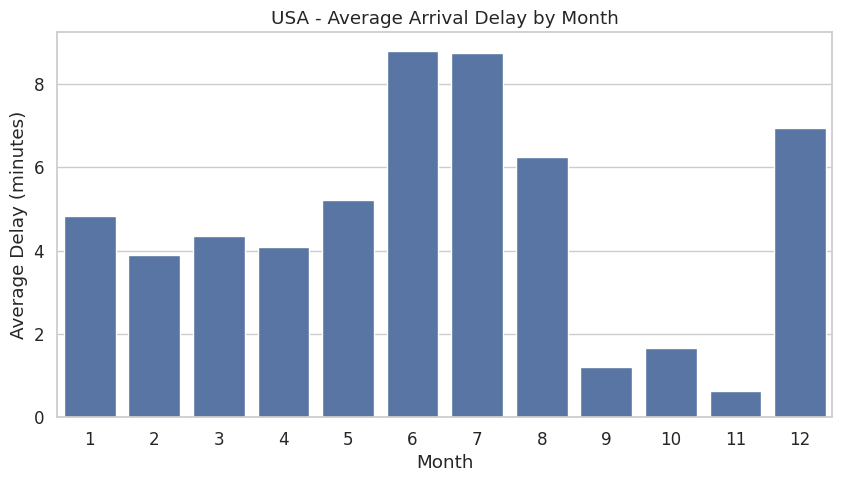

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x="MONTH", y="ARR_DELAY_MIN", data=us, ci=None)
plt.title("USA - Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.show()


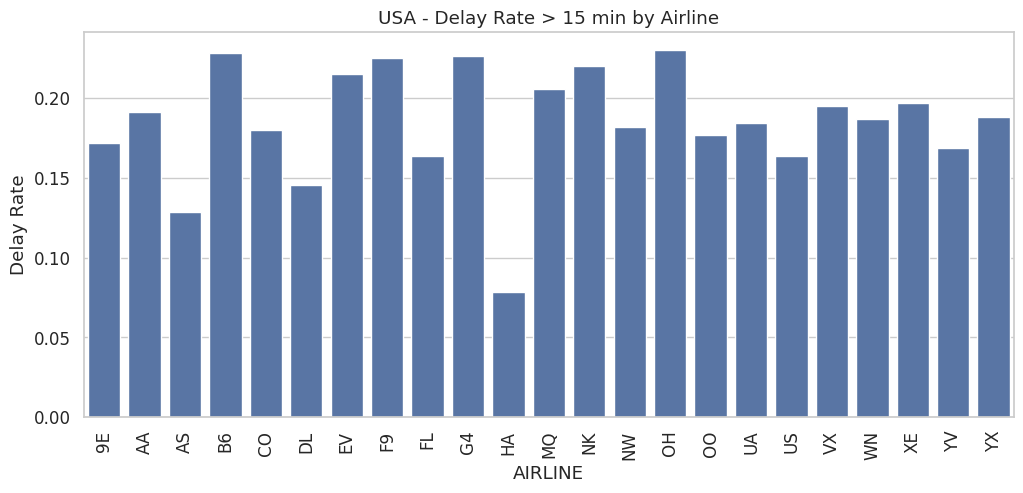

In [14]:
plt.figure(figsize=(12,5))
airline_delay = us.groupby("AIRLINE")["DELAYED_15"].mean().reset_index()

sns.barplot(x="AIRLINE", y="DELAYED_15", data=airline_delay)
plt.title("USA - Delay Rate > 15 min by Airline")
plt.ylabel("Delay Rate")
plt.xticks(rotation=90)
plt.show()


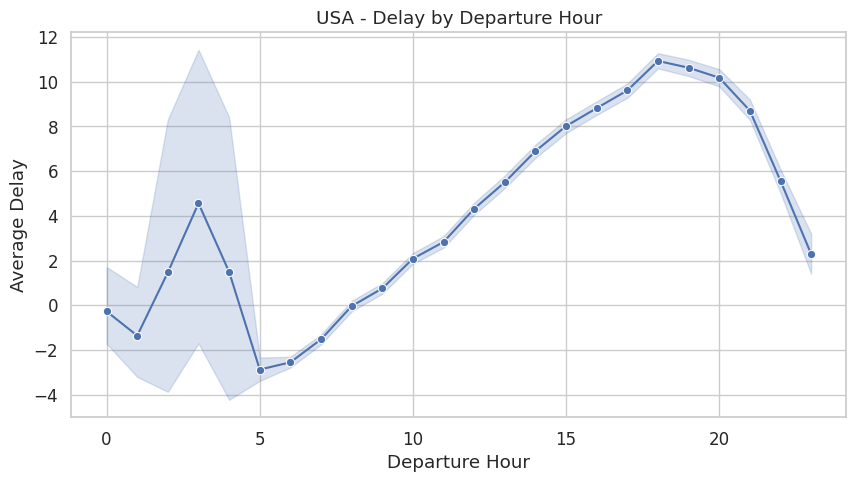

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x="DEP_HOUR", y="ARR_DELAY_MIN", data=us, marker="o")
plt.title("USA - Delay by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay")
plt.show()


/tmp/ipython-input-1188891091.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="MONTH", y="FLIGHTS_TOTAL", data=eu, ci=None)


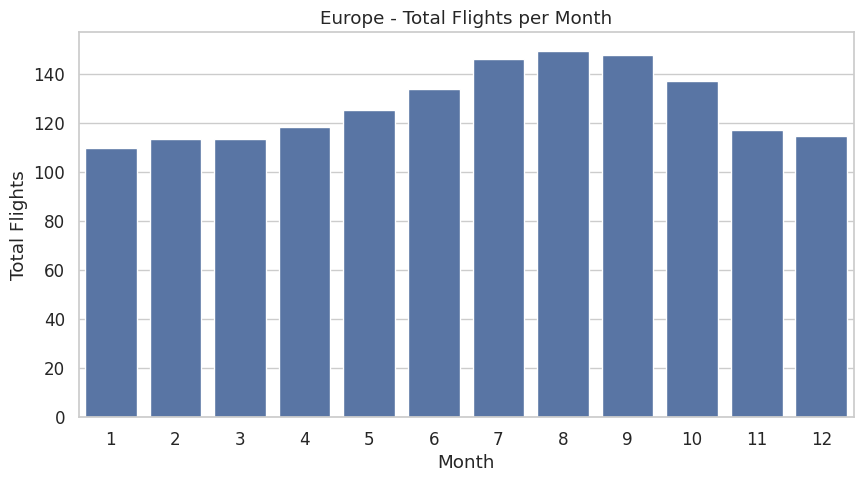

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x="MONTH", y="FLIGHTS_TOTAL", data=eu, ci=None)
plt.title("Europe - Total Flights per Month")
plt.xlabel("Month")
plt.ylabel("Total Flights")
plt.show()


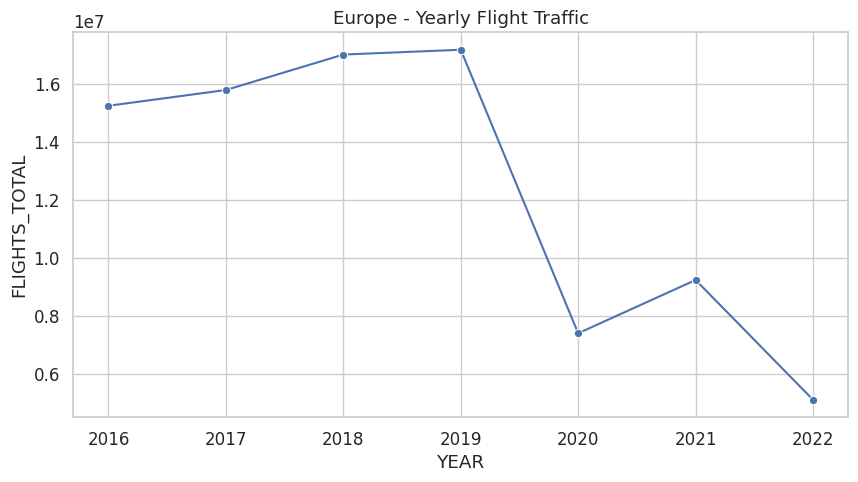

In [17]:
eu_yearly = eu.groupby("YEAR")["FLIGHTS_TOTAL"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="YEAR", y="FLIGHTS_TOTAL", data=eu_yearly, marker="o")
plt.title("Europe - Yearly Flight Traffic")
plt.show()


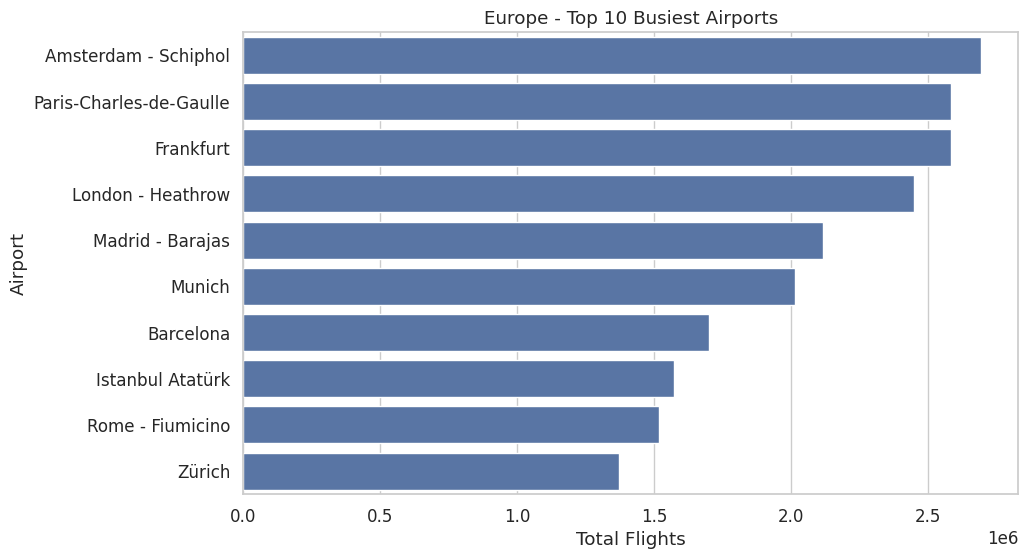

In [18]:
top_airports = (
    eu.groupby("AIRPORT_NAME")["FLIGHTS_TOTAL"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title("Europe - Top 10 Busiest Airports")
plt.xlabel("Total Flights")
plt.ylabel("Airport")
plt.show()


In [19]:
comparison = pd.DataFrame({
    "Region": ["USA", "Europe"],
    "Total Flights Recorded": [
        len(us),
        eu["FLIGHTS_TOTAL"].sum()
    ],
    "Average Delay (USA only)": [
        us["ARR_DELAY_MIN"].mean(),
        None
    ]
})

comparison


,Region,Total Flights Recorded,Average Delay (USA only)
0,USA,1208521,4.781151
1,Europe,87056538,NaN


In [21]:

us = us[us["CANCELLED"] == 0]

us = us.dropna(subset=["ARR_DELAY_MIN", "DEP_DELAY_MIN"])


us = us.dropna(subset=["AIRLINE", "ORIGIN_AIRPORT", "DEST_AIRPORT"])


In [22]:
Q1 = us["ARR_DELAY_MIN"].quantile(0.25)
Q3 = us["ARR_DELAY_MIN"].quantile(0.75)
IQR = Q3 - Q1

LOW = Q1 - 1.5 * IQR
HIGH = Q3 + 1.5 * IQR

us = us[(us["ARR_DELAY_MIN"] >= LOW) & (us["ARR_DELAY_MIN"] <= HIGH)]


In [24]:

eu["FLIGHT_DATE"] = pd.to_datetime(eu["FLIGHT_DATE"], errors="coerce")


eu = eu.dropna(subset=["FLIGHT_DATE"])

eu["MONTH"] = eu["FLIGHT_DATE"].dt.month
eu["DAY_OF_WEEK"] = eu["FLIGHT_DATE"].dt.dayofweek + 1


eu["REGION"] = eu["REGION"].fillna("UNKNOWN")

print("EU dataset after cleaning:", eu.shape)


EU dataset after cleaning: (688099, 14)


In [25]:
eu["AIRLINE"] = None
eu["ORIGIN_AIRPORT"] = None
eu["DEST_AIRPORT"] = None
eu["ARR_DELAY_MIN"] = 0
eu["DEP_DELAY_MIN"] = 0
eu["CANCELLED"] = 0
eu["CRS_DEP_TIME"] = None


In [26]:
us["SOURCE"] = "US"
eu["SOURCE"] = "EU"


In [27]:
common_cols = [
    "AIRLINE", "ORIGIN_AIRPORT", "DEST_AIRPORT",
    "ARR_DELAY_MIN", "DEP_DELAY_MIN",
    "MONTH", "DAY_OF_WEEK",
    "CRS_DEP_TIME", "CANCELLED",
    "AIRPORT_NAME", "REGION", "FLIGHTS_TOTAL",
    "SOURCE"
]


if "AIRPORT_NAME" not in us.columns:
    us["AIRPORT_NAME"] = None

if "FLIGHTS_TOTAL" not in us.columns:
    us["FLIGHTS_TOTAL"] = None

if "AIRPORT_NAME" not in eu.columns:
    eu["AIRPORT_NAME"] = eu["AIRPORT_CODE"]


In [28]:
us_final = us.reindex(columns=common_cols)
eu_final = eu.reindex(columns=common_cols)

global_data = pd.concat([us_final, eu_final], ignore_index=True)

global_data.head()


/tmp/ipython-input-415899988.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_data = pd.concat([us_final, eu_final], ignore_index=True)


,AIRLINE,ORIGIN_AIRPORT,DEST_AIRPORT,ARR_DELAY_MIN,DEP_DELAY_MIN,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CANCELLED,AIRPORT_NAME,REGION,FLIGHTS_TOTAL,SOURCE
0,US,CLE,CLT,-22.0,-6.0,8,7,900.0,0.0,None,NaN,None,US
1,UA,LGA,IAH,-42.0,-2.0,12,4,1021.0,0.0,None,NaN,None,US
2,WN,MCI,PHX,22.0,12.0,10,3,1825.0,0.0,None,NaN,None,US
3,OO,MSP,ATW,-8.0,-6.0,7,5,1935.0,0.0,None,NaN,None,US
4,DL,IND,ATL,-1.0,-3.0,3,5,1028.0,0.0,None,NaN,None,US


In [29]:
global_data.to_csv("/content/global_clean.csv", index=False)
print("Global cleaned dataset saved!")


Global cleaned dataset saved!
